**1-я часть задания:** реализация слоев, лосей и функций активации - 5 баллов.<br>

**2-я часть задания:** реализация моделей на своих классах. Что должно быть:<br>
Выберите оптимизатор и реализуйте его, чтоб он

1.   Выберите оптимизатор и реализуйте его, чтоб он работал с вашими классами. - 1 балл.
2.   Модель для задачи мультирегрессии на выбраных вами данных. Использовать FCNN, dropout, batchnorm, MSE. Пробуйте различные фукнции активации. Для первой модели попробуйте большую, среднюю и маленькую модель. - 1 балл.
3.   Модель для задачи мультиклассификации на MNIST. Использовать свёртки, макспулы, флэттэны, софтмаксы - 1 балл.
4.   Автоэнкодер для выбранных вами данных. Должен быть на свёртках и полносвязных слоях, дропаутах, батчнормах и тд. - 2 балла.

Дополнительно в оценке каждой модели будет учитываться:
*   Наличие правильно выбранной метрики и лосс функции.
*   Отрисовка графиков лосей и метрик на трейне-валидации.
*   Проверка качества модели на тесте.
*   Наличие шедулера для lr.
*   Наличие вормапа.
*   Наличие механизма ранней остановки и сохранение лучшей модели.
*   Свитч лося (метрики) и оптимайзера.

# Введение

In [1]:
import numpy as np

**Module** is an abstract class which defines fundamental methods necessary for a training a neural network. You do not need to change anything here, just read the comments.

In [2]:
class Module(object):
    """
    Basically, you can think of a module as of a something (black box)
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`:

        output = module.forward(input)

    The module should be able to perform a backward pass: to differentiate the `forward` function.
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule.

        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self):
        self.output = None
        self.gradInput = None
        self.training = True

    def forward(self, input):
        """
        Takes an input object, and computes the corresponding output of the module.
        """
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        """
        Performs a backpropagation step through the module, with respect to the given input.

        This includes
         - computing a gradient w.r.t. `input` (is needed for further backprop),
         - computing a gradient w.r.t. parameters (to update parameters while optimizing).
        """
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput


    def updateOutput(self, input):
        """
        Computes the output using the current parameter set of the class and input.
        This function returns the result which is stored in the `output` field.

        Make sure to both store the data in `output` field and return it.
        """

        # The easiest case:

        # self.output = input
        # return self.output

        pass

    def updateGradInput(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own input.
        This is returned in `gradInput`. Also, the `gradInput` state variable is updated accordingly.

        The shape of `gradInput` is always the same as the shape of `input`.

        Make sure to both store the gradients in `gradInput` field and return it.
        """

        # The easiest case:

        # self.gradInput = gradOutput
        # return self.gradInput
        pass

    def accGradParameters(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own parameters.
        No need to override if module has no parameters (e.g. ReLU).
        """
        pass

    def zeroGradParameters(self):
        """
        Zeroes `gradParams` variable if the module has params.
        """
        pass

    def getParameters(self):
        """
        Returns a list with its parameters.
        If the module does not have parameters return empty list.
        """
        return []

    def getGradParameters(self):
        """
        Returns a list with gradients with respect to its parameters.
        If the module does not have parameters return empty list.
        """
        return []

    def train(self):
        """
        Sets training mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = True

    def evaluate(self):
        """
        Sets evaluation mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = False

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want
        to have readable description.
        """
        return "Module"

# Часть 1

## Sequential container ✅


**Define** a forward and backward pass procedures.

In [ ]:
class Sequential1(Module):
    """
         This class implements a container, which processes `input` data sequentially.

         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`.
    """

    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []

    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:

            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})


        Just write a little loop.
        """
        # Your code goes here. ################################################
        self.Outputs = []
        self.output = input
        self.Outputs.append(self.output)
        for module in self.modules:
            self.output = module.forward(self.output)
            self.Outputs.append(self.output)
        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:

            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)
            gradInput = module[0].backward(input, g_1)


        !!!

        To ech module you need to provide the input, module saw while forward pass,
        it is used while computing gradients.
        Make sure that the input for `i-th` layer the output of `module[i]` (just the same input as in forward pass)
        and NOT `input` to this Sequential module.

        !!!

        """
        # Your code goes here. ################################################
        for i in range(len(self.modules) - 1, -1, -1):
            gradOutput = self.modules[i].backward(self.Outputs[i], gradOutput)
        self.gradInput = gradOutput
        return self.gradInput


    def zeroGradParameters(self):
        for module in self.modules:
            module.zeroGradParameters()

    def getParameters(self):
        """
        Should gather all parameters in a list.
        """
        params = []
        for module in self.modules:
            if len(module.getParameters())!=0:
                params.append(list(module.getParameters()))
        return params
 #       return [x.getParameters() for x in self.modules]

    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
        Grad_params = []
        for module in self.modules:
            if len(module.getGradParameters())!=0:
                Grad_params.append(list(module.getGradParameters()))
        return Grad_params
    #    return [x.getGradParameters() for x in self.modules]

    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string

    def __getitem__(self,x):
        return self.modules.__getitem__(x)

    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()

    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()

In [3]:
class Sequential(Module):
    """
         This class implements a container, which processes `input` data sequentially.

         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`.
    """

    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []

    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:

            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})


        Just write a little loop.
        """
        # Your code goes here. ################################################
        self.Outputs = []
        self.output = input
        self.Outputs.append(self.output)
        for module in self.modules:
            self.output = module.forward(self.output)
            self.Outputs.append(self.output)
        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:

            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)
            gradInput = module[0].backward(input, g_1)


        !!!

        To ech module you need to provide the input, module saw while forward pass,
        it is used while computing gradients.
        Make sure that the input for `i-th` layer the output of `module[i]` (just the same input as in forward pass)
        and NOT `input` to this Sequential module.

        !!!

        """
        # Your code goes here. ################################################
        for i in range(len(self.modules) - 1, -1, -1):
            gradOutput = self.modules[i].backward(self.Outputs[i], gradOutput)
        self.gradInput = gradOutput
        return self.gradInput


    def zeroGradParameters(self):
        for module in self.modules:
            module.zeroGradParameters()

    def getParameters(self):
        """
        Should gather all parameters in a list.
        """
     #   params = []
     #   for module in self.modules:
     #       if len(module.getParameters())!=0:
     #           params.append(list(module.getParameters()))
     #   return params
        return [x.getParameters() for x in self.modules]

    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
  #      Grad_params = []
  #      for module in self.modules:
  #          if len(module.getGradParameters())!=0:
  #              Grad_params.append(list(module.getGradParameters()))
  #      return Grad_params
        return [x.getGradParameters() for x in self.modules]

    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string

    def __getitem__(self,x):
        return self.modules.__getitem__(x)

    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()

    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()

## Layers

###1. (0.2). Linear transform layer ✅
Also known as dense layer, fully-connected layer, FC-layer, InnerProductLayer (in caffe), affine transform
- input:   **`batch_size x n_feats1`**
- output: **`batch_size x n_feats2`**

In [4]:
class Linear(Module):
    """
    A module which applies a linear transformation
    A common name is fully-connected layer, InnerProductLayer in caffe.

    The module should work with 2D input of shape (n_samples, n_feature).
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()

        # This is a nice initialization
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)

        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        self.output = np.dot(input, self.W.T) + self.b
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = np.dot(gradOutput, self.W)
        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradW += np.dot(gradOutput.T, input)
        self.gradb += np.sum(gradOutput, axis=0)
        pass

    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)

    def getParameters(self):
        return [self.W, self.b]

    def getGradParameters(self):
        return [self.gradW, self.gradb]

    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' %(s[1],s[0])
        return q

### 2. (0.2) SoftMax ✅
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{softmax}(x)_i = \frac{\exp x_i} {\sum_j \exp x_j}$

Recall that $\text{softmax}(x) == \text{softmax}(x - \text{const})$. It makes possible to avoid computing exp() from large argument.

In [5]:
p=np.array([[1,2,3], [3,2,1]])
np.divide(np.exp(p), np.sum(np.exp(p), axis=1, keepdims=True))

array([[0.09003057, 0.24472847, 0.66524096],
       [0.66524096, 0.24472847, 0.09003057]])

In [6]:
class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()

    def updateOutput(self, input):
        # start with normalization for numerical stability
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))      # max для каждого наблюдения берём свой

        # Your code goes here. ################################################✅
        self.output = np.divide(np.exp(self.output), np.sum(np.exp(self.output), axis=1, keepdims=True))
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = np.zeros_like(input)

        for i in range(input.shape[0]):
          G = np.diag(self.output[i]) - self.output[i] * self.output[i].reshape(-1, 1)
          self.gradInput[i] = np.dot(gradOutput[i], G)

        return self.gradInput

    def __repr__(self):
        return "SoftMax"

### 3. (0.2) LogSoftMax ✅
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{logsoftmax}(x)_i = \log\text{softmax}(x)_i = x_i - \log {\sum_j \exp x_j}$

The main goal of this layer is to be used in computation of log-likelihood loss.

In [7]:
p=np.array([[1,2,3], [3,2,1]])
np.subtract(p, np.log(np.sum(np.exp(p), axis=1, keepdims=True)))

array([[-2.40760596, -1.40760596, -0.40760596],
       [-0.40760596, -1.40760596, -2.40760596]])

In [8]:
-np.tile(np.exp(p[0]), (3, 1)) / np.sum(np.exp(p[0])) + np.identity(3)

array([[ 0.90996943, -0.24472847, -0.66524096],
       [-0.09003057,  0.75527153, -0.66524096],
       [-0.09003057, -0.24472847,  0.33475904]])

In [9]:
exp_input = np.exp(p[0])
n = len(exp_input)
-np.tile(exp_input, (n,1)) / np.sum(exp_input) + np.identity(n)

array([[ 0.90996943, -0.24472847, -0.66524096],
       [-0.09003057,  0.75527153, -0.66524096],
       [-0.09003057, -0.24472847,  0.33475904]])

In [10]:
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()

    def updateOutput(self, input):
        # start with normalization for numerical stability
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))

        # Your code goes here. ################################################ ✅
        self.output = np.subtract(self.output, np.log(np.sum(np.exp(self.output), axis=1, keepdims=True)))

        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = np.zeros_like(input)

        for i in range(input.shape[0]):
          exp_input = np.exp(input[i])
          n = len(exp_input)
          G = -np.tile(exp_input, (n,1)) / np.sum(exp_input) + np.identity(n)

          self.gradInput[i] = np.dot(gradOutput[i], G)
        return self.gradInput

    def __repr__(self):
        return "LogSoftMax"

### 4. (0.3) Batch normalization ✅
One of the most significant recent ideas that impacted NNs a lot is [**Batch normalization**](http://arxiv.org/abs/1502.03167). The idea is simple, yet effective: the features should be whitened ($mean = 0$, $std = 1$) all the way through NN. This improves the convergence for deep models letting it train them for days but not weeks. **You are** to implement the first part of the layer: features normalization. The second part (`ChannelwiseScaling` layer) is implemented below.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

The layer should work as follows. While training (`self.training == True`) it transforms input as $$y = \frac{x - \mu}  {\sqrt{\sigma + \epsilon}}$$
where $\mu$ and $\sigma$ - mean and variance of feature values in **batch** and $\epsilon$ is just a small number for numericall stability. Also during training, layer should maintain exponential moving average values for mean and variance:
```
    self.moving_mean = self.moving_mean * alpha + batch_mean * (1 - alpha)
    self.moving_variance = self.moving_variance * alpha + batch_variance * (1 - alpha)
```
During testing (`self.training == False`) the layer normalizes input using moving_mean and moving_variance.

Note that decomposition of batch normalization on normalization itself and channelwise scaling here is just a common **implementation** choice. In general "batch normalization" always assumes normalization + scaling.

In [11]:
class BatchNormalization(Module):
    EPS = 1e-3
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_mean = None
        self.moving_variance = None

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        if self.training == True:
          batch_mean = np.mean(input, axis=0)
          batch_variance = np.var(input, axis=0)
          self.output= (input-batch_mean) / np.sqrt((batch_variance + self.EPS))

          if self.moving_mean is None:
            self.moving_mean = batch_mean
            self.moving_variance = batch_variance

          self.moving_mean = self.moving_mean * self.alpha + batch_mean * (1 - self.alpha)
          self.moving_variance = self.moving_variance * self.alpha + batch_variance * (1 - self.alpha)
        else:
          self.output= (input-self.moving_mean) / np.sqrt((self.moving_variance + self.EPS))
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        batch_size = input.shape[0]
        batch_mean = np.mean(input, axis=0)
        batch_variance = np.var(input, axis=0)

        std = (batch_variance + self.EPS)**(-0.5)

        dL_dvar = np.sum(gradOutput * (input - batch_mean) * (-0.5) * (std)**3, axis=0)
        d_mean = np.sum(gradOutput * (-std), axis=0) + dL_dvar * (-2) * np.sum((input - batch_mean), axis=0) / batch_size

        self.gradInput = gradOutput * std + (dL_dvar * 2 * (input - batch_mean) + d_mean) / batch_size
        return self.gradInput

    def __repr__(self):
        return "BatchNormalization"

In [12]:
class ChannelwiseScaling(Module):
    """
       Implements linear transform of input y = \gamma * x + \beta
       where \gamma, \beta - learnable vectors of length x.shape[-1]
    """
    def __init__(self, n_out):
        super(ChannelwiseScaling, self).__init__()

        stdv = 1./np.sqrt(n_out)
        self.gamma = np.random.uniform(-stdv, stdv, size=n_out)
        self.beta = np.random.uniform(-stdv, stdv, size=n_out)

        self.gradGamma = np.zeros_like(self.gamma)
        self.gradBeta = np.zeros_like(self.beta)

    def updateOutput(self, input):
        self.output = input * self.gamma + self.beta
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.gamma
        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        self.gradBeta = np.sum(gradOutput, axis=0)
        self.gradGamma = np.sum(gradOutput*input, axis=0)

    def zeroGradParameters(self):
        self.gradGamma.fill(0)
        self.gradBeta.fill(0)

    def getParameters(self):
        return [self.gamma, self.beta]

    def getGradParameters(self):
        return [self.gradGamma, self.gradBeta]

    def __repr__(self):
        return "ChannelwiseScaling"

Practical notes. If BatchNormalization is placed after a linear transformation layer (including dense layer, convolutions, channelwise scaling) that implements function like `y = weight * x + bias`, than bias adding become useless and could be omitted since its effect will be discarded while batch mean subtraction. If BatchNormalization (followed by `ChannelwiseScaling`) is placed before a layer that propagates scale (including ReLU, LeakyReLU) followed by any linear transformation layer than parameter `gamma` in `ChannelwiseScaling` could be freezed since it could be absorbed into the linear transformation layer.

### 5. (0.3) Dropout ✅
Implement [**dropout**](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). The idea and implementation is really simple: just multimply the input by $Bernoulli(p)$ mask. Here $p$ is probability of an element to be zeroed.

This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons.

While training (`self.training == True`) it should sample a mask on each iteration (for every batch), zero out elements and multiply elements by $1 / (1 - p)$. The latter is needed for keeping mean values of features close to mean values which will be in test mode. When testing this module should implement identity transform i.e. `self.output = input`.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

In [13]:
np.random.binomial(1, 1-0.9, (5, 5))

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [14]:
class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()

        self.p = p
        self.mask = None

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        if self.training:
          self.mask = np.random.binomial(1, (1-self.p), input.shape)  # 1 - если нейрон не отключается
          self.output = input * self.mask / (1 - self.p)
        else:
          self.output = input
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = gradOutput * self.mask / (1 - self.p)
        return self.gradInput

    def __repr__(self):
        return "Dropout"

###6. (2.0) Conv2d ✅
Implement [**Conv2d**](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html). Use only this list of parameters: (in_channels, out_channels, kernel_size, stride, padding, bias, padding_mode) and fix dilation=1 and groups=1.

In [15]:
class Conv2d(Module):
    def __init__(self, in_channels, out_channels, kernel_size,
                 stride=1, padding=0, bias=True, padding_mode='zeros'):
        super(Conv2d, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = (stride, stride) if isinstance(stride, int) else stride
        if padding == 'same':
          self.padding = (int((self.kernel_size[0] - 1) / 2), int((self.kernel_size[1] - 1) / 2))
        else:
          self.padding = (padding, padding) if isinstance(padding, int) else padding
        self.bias_TF = bias
        self.padding_mode = padding_mode

        self.weight = np.random.randn(self.out_channels, self.in_channels, self.kernel_size[0], self.kernel_size[1])
        self.gradW = np.zeros_like(self.weight)
        if self.bias_TF:
          self.bias = np.random.randn(out_channels)
          self.gradb = np.zeros_like(self.bias)

        if self.padding_mode=='zeros':
          self.mode='constant'
          self.constant_values=0
        elif self.padding_mode=='replicate':
          self.mode='edge'
        elif self.padding_mode=='reflect':
          self.mode='reflect'
    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        batch_size = input.shape[0]
        H_in, W_in = input.shape[-2:]

        H_out = int(np.floor((H_in + 2 * self.padding[0] - self.kernel_size[0]) / self.stride[0])) + 1  # формула с семинара, только + 2 * self.padding
        W_out = int(np.floor((W_in + 2 * self.padding[1] - self.kernel_size[1]) / self.stride[1])) + 1  # 2 тк padding добавляет значения с двух сторон

        self.output = np.zeros((batch_size, self.out_channels, H_out, W_out))

        if self.mode=='constant':
          self.input_pad = np.pad(input, ((0, 0), (0, 0), (self.padding[0], self.padding[0]), (self.padding[1], self.padding[1])), mode=self.mode, constant_values=self.constant_values)
        else:
          self.input_pad = np.pad(input, ((0, 0), (0, 0), (self.padding[0], self.padding[0]), (self.padding[1], self.padding[1])), mode=self.mode)
        for n in range(batch_size):
          for c_out in range(self.out_channels):
            for h_out in range(H_out):
              for w_out in range(W_out):

                h_start = h_out * self.stride[0] # левый верхний угл рецептивного поля
                w_start = w_out * self.stride[1]

                receptive_field = self.input_pad[n, :, h_start:(h_start + self.kernel_size[0]), w_start: (w_start+ self.kernel_size[1])]
                self.output[n, c_out, h_out, w_out] = np.sum(receptive_field * self.weight[c_out])

                if self.bias_TF:
                  self.output[n, c_out, h_out, w_out] += self.bias[c_out]
        return self.output


    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        def edge_mode(row, col, input_height, input_width, padding):
          if row < padding[0]:
            original_row = 0
          elif row >= input_height + padding[0]:
            original_row = input_height - 1
          else:
            original_row = row - padding[0]

          if col < padding[1]:
            original_col = 0
          elif col >= input_width + padding[1]:
            original_col = input_width - 1
          else:
            original_col = col - padding[1]

          return original_row, original_col

        def reflect_mode(row, col, input_height, input_width, padding):
              height = input_height
              width = input_width
              original_row = row
              if row < 0:
                original_row = -row
              elif row >= height:
                original_row = 2 * (height - 1) - row

              original_col = col
              if col < 0:
                original_col = -col
              elif col >= width:
                original_col = 2 * (width - 1) - col
              return original_row, original_col


        H_in, W_in = input.shape[-2:]
        batch_size, C_out, H_out, W_out = gradOutput.shape

        self.gradInput = np.zeros_like(input)
        for n in range(batch_size):
          for c_out in range(self.out_channels):
            for h_out in range(H_out):
              for w_out in range(W_out):
                h_start = h_out * self.stride[0]
                w_start = w_out * self.stride[1]

                for c_in in range(self.in_channels):
                 for h_ker in range(self.kernel_size[0]):
                  for w_ker in range(self.kernel_size[1]):
                    h_in = h_start + h_ker - self.padding[0]
                    w_in = w_start + w_ker - self.padding[1]

                    if (0 <= h_in < H_in) and (0 <= w_in < W_in):
                       self.gradInput[n, c_in, h_in, w_in] += gradOutput[n, c_out, h_out, w_out] * self.weight[c_out, c_in, h_ker, w_ker]
                    else:
                      if self.mode=='edge':
                          original_h, original_w = edge_mode(h_in+self.padding[0], w_in+self.padding[1], H_in, W_in, self.padding)
                          self.gradInput[n, c_in, original_h, original_w] += gradOutput[n, c_out, h_out, w_out] * self.weight[c_out, c_in, h_ker, w_ker]
                      elif self.mode=='reflect':
                          original_h, original_w = reflect_mode(h_in, w_in, H_in, W_in, self.padding)
                          self.gradInput[n, c_in, original_h, original_w] += gradOutput[n, c_out, h_out, w_out] * self.weight[c_out, c_in, h_ker, w_ker]

        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        H_in, W_in = input.shape[-2:]
        batch_size, C_out, H_out, W_out = gradOutput.shape

        self.gradInput = np.zeros_like(input)

        for n in range(batch_size):
          for c_out in range(self.out_channels):
            for h_out in range(H_out):
              for w_out in range(W_out):
                h_start = h_out * self.stride[0]
                w_start = w_out * self.stride[1]

                receptive_field = self.input_pad[n, :, h_start:(h_start + self.kernel_size[0]), w_start: (w_start+ self.kernel_size[1])]

                self.gradW[c_out] += receptive_field * gradOutput[n, c_out, h_out, w_out]
                if self.bias_TF:
                  self.gradb[c_out] += gradOutput[n, c_out, h_out, w_out]
        pass

    def zeroGradParameters(self):
        self.gradW.fill(0)
        if self.bias_TF:
          self.gradb.fill(0)

    def getParameters(self):
        if self.bias_TF:
          return [self.weight, self.bias]
        else: return [self.weight]

    def getGradParameters(self):
        if self.bias_TF:
          return [self.gradW, self.gradb]
        else: return [self.gradW]

    def __repr__(self):
        return "Conv2d"

###7. (0.5) Implement [**MaxPool2d**](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and [**AvgPool2d**](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html). ✅
Use only parameters like kernel_size, stride, padding (negative infinity for maxpool and zero for avgpool) and other parameters fixed as in framework.

In [16]:
class MaxPool2d(Module):
    def __init__(self, kernel_size, stride, padding):
        super(MaxPool2d, self).__init__()

        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = (stride, stride) if isinstance(stride, int) else stride
        self.padding = (padding, padding) if isinstance(padding, int) else padding

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        batch_size, C, H_in, W_in = input.shape

        H_out = int(np.floor((H_in + 2 * self.padding[0] - self.kernel_size[0]) / self.stride[0])) + 1
        W_out = int(np.floor((W_in + 2 * self.padding[1] - self.kernel_size[1]) / self.stride[1])) + 1

        self.input_pad = np.pad(input, ((0, 0), (0, 0), (self.padding[0], self.padding[0]), (self.padding[1], self.padding[1])), mode='constant', constant_values=-np.inf)

        self.output = np.zeros((batch_size, C, H_out, W_out))

        for n in range(batch_size):
            for c in range(C):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                      h_start = h_out * self.stride[0] # левый верхний угл рецептивного поля
                      w_start = w_out * self.stride[1]

                      receptive_field = self.input_pad[n, c, h_start:(h_start + self.kernel_size[0]), w_start:(w_start+ self.kernel_size[1])]
                      self.output[n,c,h_out,w_out] = np.max(receptive_field)
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        H_in, W_in = input.shape[-2:]
        batch_size, C, H_out, W_out = gradOutput.shape

        self.gradInput = np.zeros_like(input)

        for n in range(batch_size):
            for c in range(C):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                      h_start = h_out * self.stride[0] # левый верхний угл рецептивного поля
                      w_start = w_out * self.stride[1]

                      receptive_field = self.input_pad[n, c, h_start:(h_start + self.kernel_size[0]), w_start:(w_start+ self.kernel_size[1])]
                      index = np.unravel_index(np.argmax(receptive_field), receptive_field.shape)

                      h_index = h_start - self.padding[0] + index[0]
                      w_index = w_start - self.padding[1] + index[1]

                      if 0 <= h_index < H_in and 0 <= w_index < W_in:
                        self.gradInput[n, c, h_index, w_index] += gradOutput[n, c, h_out, w_out]
        return self.gradInput

    def __repr__(self):
        return "MaxPool2d"



class AvgPool2d(Module):
    def __init__(self, kernel_size, stride, padding):
        super(AvgPool2d, self).__init__()

        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = (stride, stride) if isinstance(stride, int) else stride
        self.padding = (padding, padding) if isinstance(padding, int) else padding

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        batch_size, C, H_in, W_in = input.shape

        H_out = int(np.floor((H_in + 2 * self.padding[0] - self.kernel_size[0]) / self.stride[0])) + 1
        W_out = int(np.floor((W_in + 2 * self.padding[1] - self.kernel_size[1]) / self.stride[1])) + 1

        self.input_pad = np.pad(input, ((0, 0), (0, 0), (self.padding[0], self.padding[0]), (self.padding[1], self.padding[1])), mode='constant', constant_values=0)

        self.output = np.zeros((batch_size, C, H_out, W_out))

        for n in range(batch_size):
            for c in range(C):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                      h_start = h_out * self.stride[0] # левый верхний угл рецептивного поля
                      w_start = w_out * self.stride[1]

                      receptive_field = self.input_pad[n, c, h_start:(h_start + self.kernel_size[0]), w_start:(w_start+ self.kernel_size[1])]
                      self.output[n,c,h_out,w_out] = np.average(receptive_field)
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        batch_size, C, H_out, W_out = gradOutput.shape
        H_in, W_in = input.shape[-2:]

        self.gradInput = np.zeros_like(input)
        n_pix = self.kernel_size[0] * self.kernel_size[1]

        for n in range(batch_size):
            for c in range(C):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                      h_start = h_out * self.stride[0]  # левый верхний угл рецептивного поля
                      w_start = w_out * self.stride[1]

                      for h_ker in range(self.kernel_size[0]):
                        for w_ker in range(self.kernel_size[1]):
                          h_in = h_start + h_ker - self.padding[0]
                          w_in = w_start + w_ker - self.padding[1]

                          if (0 <= h_in < H_in) and (0 <= w_in < W_in):
                            self.gradInput[n, c, h_in, w_in] += gradOutput[n,c,h_out,w_out] / n_pix
        return self.gradInput

    def __repr__(self):
        return "AvgPool2d"

###8. (0.3) Implement **GlobalMaxPool2d** and **GlobalAvgPool2d**.
They do not have testing and parameters are up to you but they must aggregate information within channels. Write test functions for these layers on your own.

Как я поняла: <br> у нас на вход есть тензор размера (batch_size, C_in, H_in, W_in). Выход:

*   (batch_size, C_in, 1, 1) если keepdims=True
*   (batch_size, C_in) если keepdims=False



In [17]:
class GlobalMaxPool2d(Module):
    def __init__(self, keepdims):
        super(GlobalMaxPool2d, self).__init__()

        self.keepdims = keepdims

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        batch_size, C, H, W = input.shape

        self.output = np.max(input, axis=(2, 3))
        input_1 = input.reshape(batch_size, C, -1)
        self.max_indices = np.argmax(input_1, axis=2)
        if self.keepdims:
          self.output = self.output.reshape((batch_size, C, 1, 1))
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################❌
        batch_size, C = gradOutput.shape[:2]
        H, W = input.shape[-2:]

        self.gradInput = np.zeros_like(input)

        if self.keepdims:
            gradOutput = gradOutput.reshape(batch_size, C)

        max_h = self.max_indices // W
        max_w = self.max_indices % W

        batch, channel = np.indices((batch_size, C))

        self.gradInput[batch, channel, max_h, max_w] = gradOutput
        return self.gradInput

    def __repr__(self):
        return "GlobalMaxPool2d"

In [18]:
class GlobalAvgPool2d(Module):
    def __init__(self, keepdims):
        super(GlobalAvgPool2d, self).__init__()

        self.keepdims = keepdims

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        batch_size, C, H, W = input.shape

        self.output = np.average(input, axis=(2, 3))

        if self.keepdims:
          self.output = self.output.reshape((batch_size, C, 1, 1))
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################❌
        batch_size, C = gradOutput.shape[:2]
        H, W = input.shape[-2:]
        n_pix = H*W

        self.gradInput = np.zeros_like(input)

        if self.keepdims:
            gradOutput = gradOutput.reshape(batch_size, C)

        for n in range(batch_size):
            for c in range(C):
              self.gradInput[n, c] = gradOutput[n,c] / n_pix

        return self.gradInput

    def __repr__(self):
        return "GlobalAvgPool2d"

###9. (0.2) Implement [**Flatten**](https://pytorch.org/docs/stable/generated/torch.flatten.html) ✅

In [19]:
class Flatten(Module):
    def __init__(self, start_dim=0, end_dim=-1):
        super(Flatten, self).__init__()

        self.start_dim = start_dim
        self.end_dim = end_dim

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        self.in_shape = input.shape
        in_sh = list(self.in_shape)

        if self.end_dim == -1:
            self.end_dim = len(in_sh) - 1

        out_shape = in_sh[:self.start_dim]
        prod = np.prod(in_sh[self.start_dim : self.end_dim + 1])
        out_shape.append(prod)
        out_shape.extend(in_sh[self.end_dim + 1:])

        out_shape = tuple(out_shape)
        self.output = input.reshape(out_shape)
        return self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = gradOutput.reshape(self.in_shape)
        return self.gradInput

    def __repr__(self):
        return "Flatten"

## Activation functions ✅

Here's the complete example for the **Rectified Linear Unit** non-linearity (aka **ReLU**):

In [20]:
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()

    def updateOutput(self, input):
        self.output = np.maximum(input, 0)
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput , input > 0)
        return self.gradInput

    def __repr__(self):
        return "ReLU"

### 10. (0.1) Leaky ReLU ✅
Implement [**Leaky Rectified Linear Unit**](http://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29%23Leaky_ReLUs). Expriment with slope.

In [21]:
a = np.array([[10,2], [3,4]])
b = np.array([[3,4],[5,6]])
np.maximum(a, b)

array([[10,  4],
       [ 5,  6]])

In [22]:
class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()

        self.slope = slope

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        self.output = np.maximum(self.slope*input, input)
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = np.where(input>0, gradOutput, self.slope*gradOutput)
        return self.gradInput

    def __repr__(self):
        return "LeakyReLU"

### 11. (0.1) ELU ✅
Implement [**Exponential Linear Units**](http://arxiv.org/abs/1511.07289) activations.

In [23]:
class ELU(Module):
    def __init__(self, alpha = 1.0):
        super(ELU, self).__init__()

        self.alpha = alpha

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        self.output = np.where(input<0, self.alpha*(np.exp(input)-1), input)
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = np.where(input<0, gradOutput*self.alpha*np.exp(input), gradOutput)
        return self.gradInput

    def __repr__(self):
        return "ELU"

### 12. (0.1) SoftPlus ✅
Implement [**SoftPlus**](https://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29) activations. Look, how they look a lot like ReLU.

In [24]:
class SoftPlus(Module):
    def __init__(self):
        super(SoftPlus, self).__init__()

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        self.output = np.log(1+np.exp(input))
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################✅
        self.gradInput = gradOutput* np.exp(input) / (1+np.exp(input))
        return self.gradInput

    def __repr__(self):
        return "SoftPlus"

### 13. (0.2) Gelu ✅
Implement [**Gelu**](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html) activations.

In [25]:
class Gelu(Module):
    def __init__(self):
        super(Gelu, self).__init__()

    def updateOutput(self, input):
        # Your code goes here. ################################################✅
        self.output = 0.5 * input * (1 + np.tanh((2 / np.pi)**0.5 * (input + 0.044715 * input**3)))
        return  self.output

    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ###############################################✅
        x = input
        r = np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)
        dtanh_dx = (1 - np.tanh(r)**2) * np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * x**2)
        dy_dx = 0.5 * (1 + np.tanh(r)) + 0.5*x*dtanh_dx

        self.gradInput = gradOutput * dy_dx
        return self.gradInput

    def __repr__(self):
        return "Gelu"

## Criterions ✅

Criterions are used to score the models answers.

In [26]:
class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None

    def forward(self, input, target):
        """
            Given an input and a target, compute the loss function
            associated to the criterion and return the result.

            For consistency this function should not be overrided,
            all the code goes in `updateOutput`.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
            Given an input and a target, compute the gradients of the loss function
            associated to the criterion and return the result.

            For consistency this function should not be overrided,
            all the code goes in `updateGradInput`.
        """
        return self.updateGradInput(input, target)

    def updateOutput(self, input, target):
        """
        Function to override.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Function to override.
        """
        return self.gradInput

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want
        to have readable description.
        """
        return "Criterion"

The **MSECriterion**, which is basic L2 norm usually used for regression, is implemented here for you.
- input:   **`batch_size x n_feats`**
- target: **`batch_size x n_feats`**
- output: **scalar**

In [27]:
class MSECriterion(Criterion):
    def __init__(self):
        super(MSECriterion, self).__init__()

    def updateOutput(self, input, target):
        self.output = np.sum(np.power(input - target,2)) / input.shape[0]
        return self.output

    def updateGradInput(self, input, target):
        self.gradInput  = (input - target) * 2 / input.shape[0]
        return self.gradInput

    def __repr__(self):
        return "MSECriterion"

### 14. (0.2) Negative LogLikelihood criterion (numerically unstable) ✅
You task is to implement the **ClassNLLCriterion**. It should implement [multiclass log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss). Nevertheless there is a sum over `y` (target) in that formula,
remember that targets are one-hot encoded. This fact simplifies the computations a lot. Note, that criterions are the only places, where you divide by batch size. Also there is a small hack with adding small number to probabilities to avoid computing log(0).
- input:   **`batch_size x n_feats`** - probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**



In [28]:
class ClassNLLCriterionUnstable(Criterion):
    EPS = 1e-15
    def __init__(self):
       # a = super(ClassNLLCriterionUnstable, self)
        super(ClassNLLCriterionUnstable, self).__init__()

    def updateOutput(self, input, target):

        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)

        # Your code goes here. ################################################
        batch_size = input.shape[0]
        loss = -np.log(input_clamp) * target
        self.output = np.sum(loss) / batch_size
        return self.output

    def updateGradInput(self, input, target):

        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)

        # Your code goes here. ################################################
        batch_size = input.shape[0]
        self.gradInput = (-1/batch_size) * (target / input_clamp)
        return self.gradInput

    def __repr__(self):
        return "ClassNLLCriterionUnstable"

### 15. (0.3) Negative LogLikelihood criterion (numerically stable)✅
- input:   **`batch_size x n_feats`** - log probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**

Task is similar to the previous one, but now the criterion input is the output of log-softmax layer. This decomposition allows us to avoid problems with computation of forward and backward of log().

In [29]:
class ClassNLLCriterion(Criterion):
    def __init__(self):
       # a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()

    def updateOutput(self, input, target):
        # Your code goes here. ################################################
        batch_size = input.shape[0]
        self.output = - np.sum(input * target) / batch_size
        return self.output

    def updateGradInput(self, input, target):
        # Your code goes here. ################################################
        batch_size = input.shape[0]

        self.gradInput = -target / batch_size
        return self.gradInput

    def __repr__(self):
        return "ClassNLLCriterion"

# Часть 2

# 1. Adam

In [30]:
class Adam():
    def __init__(self, Module, learning_rate=0.001, beta1=0.9, beta2=0.95, epsilon=1e-5):

        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        self.grad_parameters = Module.getGradParameters()
        self.parameters = Module.getParameters()
        self.h = []
        self.G = []
        for i in range(len(self.grad_parameters)):
          for j in range(len(self.grad_parameters[i])):
            self.h = self.h + [np.zeros_like(self.grad_parameters[i][j])]
            self.G = self.G + [np.zeros_like(self.grad_parameters[i][j])]
        self.t = 0
    def step(self):
        k=0
        for i in range(len(self.grad_parameters)):
          for j in range(len(self.grad_parameters[i])):
            self.h[k] = self.beta1 * self.h[k] + (1 - self.beta1) * self.grad_parameters[i][j]
            self.G[k] = self.beta2 * self.G[k] + (1 - self.beta2) * (self.grad_parameters[i][j]**2)
            h_hat = self.h[k] / (1 - self.beta1**(self.t+1))
            G_hat = self.G[k] / (1 - self.beta2**(self.t+1))
            self.parameters[i][j] -= self.learning_rate * h_hat / np.sqrt(G_hat+self.epsilon)
            k+=1
        self.t += 1


# 2. Мультирегрессия

Модель для задачи мультирегрессии на выбраных вами данных. Использовать FCNN, dropout, batchnorm, MSE. Пробуйте различные фукнции активации. Для первой модели попробуйте большую, среднюю и маленькую модель. - 1 балл.

In [31]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, n_targets=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_train.shape

(800, 3)

### Маленькая модель

In [33]:
model_small = Sequential1()

model_small.add(Linear(X_train.shape[1], 64))
model_small.add(BatchNormalization())
model_small.add(ReLU())
model_small.add(Dropout(0.1))

model_small.add(Linear(64, 32))
model_small.add(BatchNormalization())
model_small.add(Gelu())
model_small.add(Dropout(0.5))

model_small.add(Linear(32, 3))

model_small

Linear 10 -> 64
BatchNormalization
ReLU
Dropout
Linear 64 -> 32
BatchNormalization
Gelu
Dropout
Linear 32 -> 3

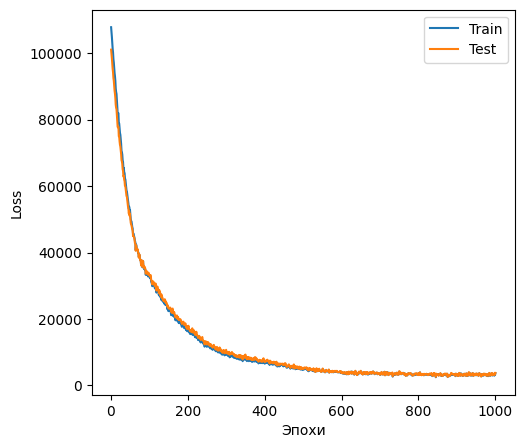

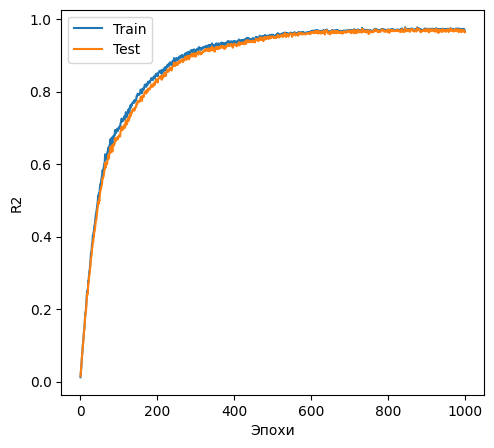

In [34]:
criterion = MSECriterion()
optimizer = Adam(model_small, learning_rate=0.01)

def trainnn(model, criterion, optimizer, num_epochs, batch_size):
  train_losses = []
  test_losses = []
  train_R2 = []
  test_R2 = []

  for epoch in range(num_epochs):
      model.train()
      for i in range(0, X_train.shape[0], batch_size):
          X_batch = X_train[i:i+batch_size]
          y_batch = y_train[i:i+batch_size]

          output = model.forward(X_batch)
          loss = criterion.updateOutput(output, y_batch)

          grad_output = criterion.updateGradInput(output, y_batch)
          model.backward(X_batch, grad_output)

          optimizer.step()
          model.zeroGradParameters()

      model.evaluate()
      train_output = model.forward(X_train)
      train_loss = criterion.forward(train_output, y_train)
      train_losses.append(train_loss)
      train_R2.append(r2_score(y_train, train_output))

      test_output = model.forward(X_test)
      test_loss = criterion.forward(test_output, y_test)
      test_losses.append(test_loss)
      test_R2.append(r2_score(y_test, test_output))
  return train_losses, test_losses, train_R2, test_R2

train_losses, test_losses, train_R2, test_R2 = trainnn(model_small, criterion, optimizer, 1000, 120)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train")
plt.plot(range(1, len(test_losses)+1), test_losses, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("Loss")
plt.legend()

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(range(1, len(train_R2)+1), train_R2, label="Train")
plt.plot(range(1, len(test_R2)+1), test_R2, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("R2")
plt.legend()

## Средняя модель

In [35]:
model_medium = Sequential1()

model_medium.add(Linear(X_train.shape[1], 128))
model_medium.add(BatchNormalization())
model_medium.add(ReLU())
model_medium.add(Dropout(0.2))

model_medium.add(Linear(128, 64))
model_medium.add(BatchNormalization())
model_medium.add(ReLU())

model_medium.add(Linear(64, 32))
model_medium.add(BatchNormalization())
model_medium.add(ReLU())

model_medium.add(Linear(32, 16))
model_medium.add(BatchNormalization())
model_medium.add(ReLU())
model_medium.add(Dropout(0.5))


model_medium.add(Linear(16, 3))

model_medium

Linear 10 -> 128
BatchNormalization
ReLU
Dropout
Linear 128 -> 64
BatchNormalization
ReLU
Linear 64 -> 32
BatchNormalization
ReLU
Linear 32 -> 16
BatchNormalization
ReLU
Dropout
Linear 16 -> 3

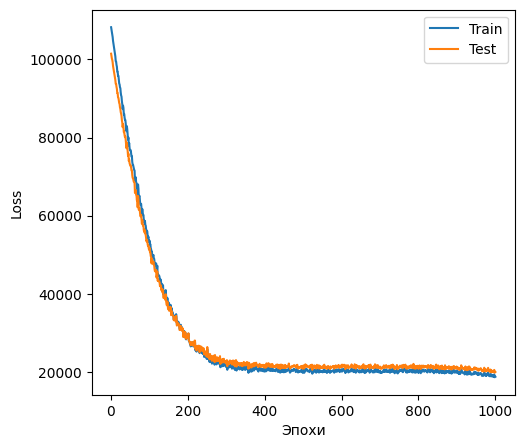

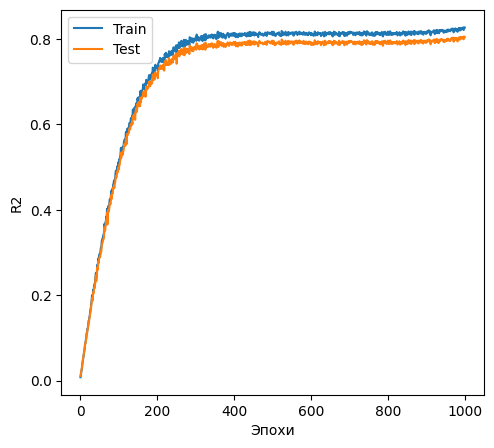

In [36]:
criterion = MSECriterion()
optimizer = Adam(model_medium, learning_rate=0.01)

train_losses, test_losses, train_R2, test_R2 = trainnn(model_medium, criterion, optimizer, 1000, 120)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train")
plt.plot(range(1, len(test_losses)+1), test_losses, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("Loss")
plt.legend()

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(range(1, len(train_R2)+1), train_R2, label="Train")
plt.plot(range(1, len(test_R2)+1), test_R2, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("R2")
plt.legend()

## Большая модель

In [37]:
model_large = Sequential1()

model_large.add(Linear(X_train.shape[1], 256))
model_large.add(BatchNormalization())
model_large.add(ReLU())
model_large.add(Dropout(0.2))

model_large.add(Linear(256, 128))
model_large.add(BatchNormalization())

model_large.add(Linear(128, 64))
model_large.add(BatchNormalization())
model_large.add(ELU())

model_large.add(Linear(64, 32))
model_large.add(BatchNormalization())
model_large.add(Gelu())

model_large.add(Linear(32, 16))
model_large.add(BatchNormalization())
model_large.add(Gelu())
model_large.add(Dropout(0.5))


model_large.add(Linear(16, 3))

model_large

Linear 10 -> 256
BatchNormalization
ReLU
Dropout
Linear 256 -> 128
BatchNormalization
Linear 128 -> 64
BatchNormalization
ELU
Linear 64 -> 32
BatchNormalization
Gelu
Linear 32 -> 16
BatchNormalization
Gelu
Dropout
Linear 16 -> 3

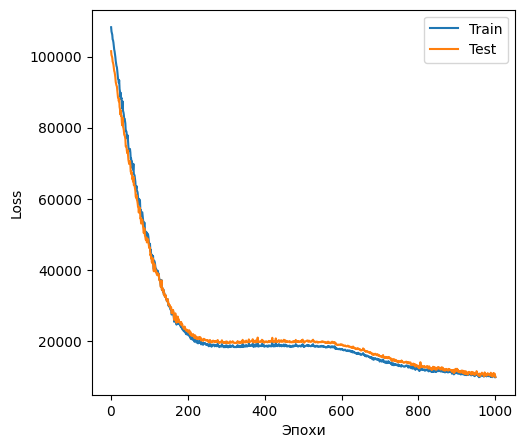

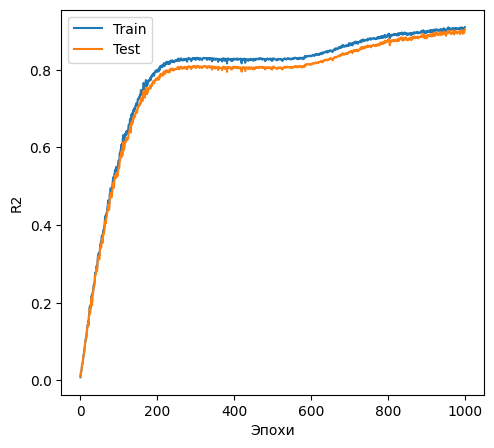

In [38]:
criterion = MSECriterion()
optimizer = Adam(model_large, learning_rate=0.01)

train_losses, test_losses, train_R2, test_R2 = trainnn(model_large, criterion, optimizer, 1000, 128)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train")
plt.plot(range(1, len(test_losses)+1), test_losses, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("Loss")
plt.legend()

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(range(1, len(train_R2)+1), train_R2, label="Train")
plt.plot(range(1, len(test_R2)+1), test_R2, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("R2")
plt.legend()

# 3. MNIST

In [47]:
from torchvision.datasets import MNIST
import torchvision.transforms as T

train_set = MNIST('.MNIST', transform=T.ToTensor(), train=True, download=True)
test_set = MNIST('.MNIST', transform=T.ToTensor(), train=False, download=True)

X_train = np.expand_dims(train_set.data.numpy(), axis=1)
y_train = np.expand_dims(train_set.targets.numpy(), axis=1)

X_test = np.expand_dims(test_set.data.numpy(), axis=1)
y_test = np.expand_dims(test_set.targets.numpy(), axis=1)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_small, _, y_train_small, _ = train_test_split(
    X_train, y_train,
    train_size=1000,
    stratify=y_train,
)

X_test_small, _, y_test_small, _ = train_test_split(
    X_test, y_test,
    train_size=200,
    stratify=y_test,
)

In [48]:
X_train_small.shape

(1000, 1, 28, 28)

In [49]:
model_MNIST = Sequential1()

model_MNIST.add(Conv2d(1, 32, kernel_size=3,stride=1, padding=0, bias=True, padding_mode='zeros'))
model_MNIST.add(BatchNormalization())
model_MNIST.add(ReLU())
model_MNIST.add(MaxPool2d(kernel_size=2, stride=2, padding=0))

#model_MNIST.add(Conv2d(32, 64, kernel_size=3,stride=1, padding=0, bias=True, padding_mode='zeros'))
#model_MNIST.add(BatchNormalization())
#model_MNIST.add(ReLU())
#model_MNIST.add(MaxPool2d(kernel_size=2, stride=2, padding=0))

model_MNIST.add(Flatten( start_dim=1))
model_MNIST.add(Linear(32*13*13, 128))
model_MNIST.add(Dropout(0.5))
model_MNIST.add(Linear(128, 10))
model_MNIST.add(SoftMax())
model_MNIST

Conv2d
BatchNormalization
ReLU
MaxPool2d
Flatten
Linear 5408 -> 128
Dropout
Linear 128 -> 10
SoftMax

In [50]:
criterion = ClassNLLCriterionUnstable()
optimizer = Adam(model_MNIST, learning_rate=0.01)

def train_class(model, criterion, optimizer, num_epochs, batch_size):
  train_losses = []
  test_losses = []

  for epoch in range(num_epochs):
      model.train()
      for i in range(0, X_train_small.shape[0], batch_size):
          X_batch = X_train_small[i:i+batch_size]
          y_batch = y_train_small[i:i+batch_size]

          output = model.forward(X_batch)
          loss = criterion.updateOutput(output, y_batch)

          grad_output = criterion.updateGradInput(output, y_batch)
          model.backward(X_batch, grad_output)

          optimizer.step()
          model.zeroGradParameters()

      model.evaluate()
      train_output = model.forward(X_train_small)
      train_loss = criterion.forward(train_output, y_train_small)
      train_losses.append(train_loss)

      test_output = model.forward(X_test_small)
      test_loss = criterion.forward(test_output, y_test_small)
      test_losses.append(test_loss)
  return train_losses, test_losses

train_losses, test_losses = train_class(model_MNIST, criterion, optimizer, 5, 128)

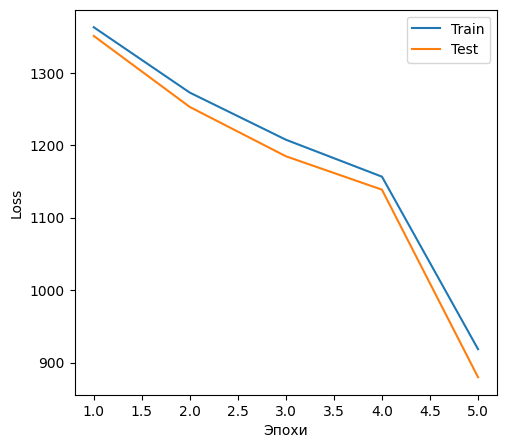

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train")
plt.plot(range(1, len(test_losses)+1), test_losses, label="Test")
plt.xlabel("Эпохи")
plt.ylabel("Loss")
plt.legend()

#Автоэнкодер ( не получилось :( )

In [57]:
from torchvision.datasets import MNIST
import torchvision.transforms as T

train_set = MNIST('.MNIST', transform=T.ToTensor(), train=True, download=True)
test_set = MNIST('.MNIST', transform=T.ToTensor(), train=False, download=True)

X_train = np.expand_dims(train_set.data.numpy(), axis=1)
y_train = np.expand_dims(train_set.targets.numpy(), axis=1)

X_test = np.expand_dims(test_set.data.numpy(), axis=1)
y_test = np.expand_dims(test_set.targets.numpy(), axis=1)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_small, _, y_train_small, _ = train_test_split(
    X_train, y_train,
    train_size=100,
    stratify=y_train,
)

X_test_small, _, y_test_small, _ = train_test_split(
    X_test, y_test,
    train_size=20,
    stratify=y_test,
)

In [56]:
encoder = Sequential1()
encoder.add(Conv2d(1, 32, kernel_size=3, stride=1))
encoder.add(BatchNormalization())
encoder.add(ReLU())
encoder.add(MaxPool2d(kernel_size=2, stride=2))

encoder.add(Conv2d(32, 64, kernel_size=3, stride=1))
encoder.add(BatchNormalization())
encoder.add(ReLU())
encoder.add(MaxPool2d(kernel_size=2, stride=2))

encoder.add(Flatten())
encoder.add(Linear(64 * 5 * 5, 128))
encoder.add(Gelu())

In [58]:
class Reshape(Module):
    def __init__(self, output_shape):
        super(Reshape, self).__init__()
        self.output_shape = output_shape

    def updateOutput(self, input):
        self.output = input.reshape(input.shape[0], self.output_shape)
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput.reshape(input.shape)
        return self.gradInput

    def __repr__(self):
        return "Reshape"

Я вот тут запнулась и не успела разобраться как нормально decoder написать

In [54]:
decoder = Sequential1()
decoder.add(Linear(128, 64 * 5 * 5))
decoder.add(ReLU())
decoder.add(Reshape(-1, 64, 5, 5))

decoder.add(Conv2d(64, 32, kernel_size=3, stride=1, padding=1))
decoder.add(BatchNormalization())
decoder.add(ReLU())
decoder.add(AvgPool2d(kernel_size=2, stride=2, padding=0))

decoder.add(Conv2d(32, 1, kernel_size=3, stride=1, padding=1))
decoder.add(ReLU())

In [55]:
class Autoencoder():
    def __init__(self, encoder, decoder):
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        encoded = self.encoder.forward(x)
        decoded = self.decoder.forward(encoded)
        return decoded

    def backward(self, x, grad_output):
        grad_decoder = self.decoder.backward(x, grad_output)
        grad_encoder = self.encoder.backward(x, grad_decoder)
        return grad_encoder

autoencoder = Autoencoder(encoder, decoder)